### Load libriers

In [153]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Requesting data from website**

In [86]:
from requests import get
url = 'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page=1'
response = requests.get(url)
html = response.content
html_soup = BeautifulSoup(html, "html.parser")
book_containers = html_soup.find_all('tr',itemtype="http://schema.org/Book")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
100


In [87]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [88]:
first_book = book_containers[0]
first_book

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="1885"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="1885" data-resource-type="Book">
<a href="/book/show/1885.Pride_and_Prejudice" title="Pride and Prejudice">
<img alt="Pride and Prejudice" class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351i/1885._SY75_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/1265.Jane_Austen" itemprop="url"><span itemprop="name">Jane Austen</s

In [89]:
book_containers = html_soup.find_all('div', class_ ="elementList")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
0


In [90]:
name = first_book.find('a',class_="bookTitle").text.strip()
authors = first_book.find('a',class_="authorName").text.strip()

scoring = first_book.find('span',class_="greyText smallText uitext").text.strip().split()
avg_scores=scoring[0]
rates = scoring[4]

voted= first_book.find('span',class_="smallText uitext").text.strip().split()
scores=voted[1]
vote=voted[3]




In [91]:
print("name:",name)
print("authors:",authors)
print("scoring:",scoring)
print("averae sores:",avg_scores)
print("ratings", rates)
print("scores:",scores)

print("votes:",vote)

name: Pride and Prejudice
authors: Jane Austen
scoring: ['4.28', 'avg', 'rating', '—', '3,890,479', 'ratings']
averae sores: 4.28
ratings 3,890,479
scores: 237,502,
votes: 2,403


In [92]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()        
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

In [93]:
names

['Pride and Prejudice',
 'Fifty Shades of Grey (Fifty Shades, #1)',
 'Beautiful Disaster (Beautiful, #1)',
 'Twilight (The Twilight Saga, #1)',
 'The Notebook (The Notebook, #1)',
 'Perfect Chemistry (Perfect Chemistry, #1)',
 'Outlander (Outlander, #1)',
 'Jane Eyre',
 'Thoughtless (Thoughtless, #1)',
 'Bared to You (Crossfire, #1)',
 'Easy (Contours of the Heart, #1)',
 'Gone with the Wind',
 "Gabriel's Inferno (Gabriel's Inferno, #1)",
 "The Time Traveler's Wife",
 'Slammed (Slammed, #1)',
 'Anna and the French Kiss (Anna and the French Kiss, #1)',
 'Vampire Academy (Vampire Academy, #1)',
 'A Walk to Remember',
 'Dark Lover (Black Dagger Brotherhood, #1)',
 'Wuthering Heights',
 'Hush, Hush (Hush, Hush, #1)',
 'The Fault in Our Stars',
 'Sense and Sensibility',
 'Persuasion',
 'The Host (The Host, #1)',
 'Divergent (Divergent, #1)',
 'City of Bones (The Mortal Instruments, #1)',
 'Obsidian (Lux, #1)',
 'Love Unscripted (Love, #1)',
 'On the Island (On the Island, #1)',
 'Hopeless (

## Reading data

In [120]:
import pandas as pd
df = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score' : score,
'votes': votes
})
data=df # storing in another variable just not run requeste content again and again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4999 non-null   object
 1   ratings     4999 non-null   object
 2   avg_score   4999 non-null   object
 3   author      4999 non-null   object
 4   score       4999 non-null   object
 5   votes       4999 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


In [121]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,890,479",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,408,633",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","642,885",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,098,307",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,618",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,270",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,431",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [122]:
#dowmlading data as CSV file
import os  
os.makedirs('D:\webscrap\Goodreads', exist_ok=True)  
data.to_csv('D:\webscrap\Goodreads\Romantic.csv') 

In [123]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [124]:
data.shape

(4999, 6)

In [125]:
data.describe()

,book title,ratings,avg_score,author,score,votes
count,4999,4999,4999,4999,4999,4999
unique,4983,3744,194,2457,1141,182
top,A French Affair,avg,really,Nora Roberts,"100,",1
freq,2,170,111,70,479,2851


all columns are in object type so in descibing data get messy

In [126]:
data.shape

(4999, 6)

###  Data cleaing and handling

**Lets clean the data**
   - remove inaccurate  values in data
   - convert the number type columns from object type to int or float
   - detect outliers and handle

In [127]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,890,479",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,408,633",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","642,885",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,098,307",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,618",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,270",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,431",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [128]:
data.sort_values(by=['votes','ratings'], ascending=False).head(10)

,book title,ratings,avg_score,author,score,votes
124,"Lady Be Good (Wynette, Texas, #2)","17,449",3.99,Susan Elizabeth Phillips,"6,460,",98
109,"Pleasure Unbound (Demonica, #1)","53,014",4.04,Larissa Ione,"8,392,",97
103,Heart on a Chain,"17,165",4.03,Cindy C. Bennett,"8,907,",97
125,"Dream a Little Dream (Chicago Stars, #4)","33,713",4.17,Susan Elizabeth Phillips,"6,390,",95
113,"Something Wonderful (Sequels, #2)","28,779",4.31,Judith McNaught,"7,709,",95
6,"Outlander (Outlander, #1)","981,308",4.25,Diana Gabaldon,"91,404,",932
122,"Vain (The Seven Deadly, #1)","30,325",4.22,Fisher Amelie,"6,666,",91
118,"Rules of Protection (Tangled in Texas, #1)","7,478",3.84,Alison Bliss,"7,406,",90
111,"Cross My Heart (Cross My Heart, #1)","18,662",3.91,Katie Klein,"8,091,",90
814,Sweet Revenge,avg,really,Nora Roberts,"530,",9


- i was check on data with diffrent scenorio, here in row of 814 rating values is 'avg'and avg_score values is 'really', so need to remove values before or EDA or analysing it. those are inacuurate values, drop them is best solution 

In [129]:
string_val_row=data[data['ratings'] == 'avg']

string_val_row

,book title,ratings,avg_score,author,score,votes
44,"Leaving Paradise (Leaving Paradise, #1)",avg,really,Simone Elkeles,"20,519,",222
72,"Wallbanger (Cocktail, #1)",avg,really,Alice Clayton,"13,646,",161
98,Lock and Key,avg,really,Sarah Dessen,"9,825,",112
115,"Backstage Pass (Sinners on Tour, #1)",avg,really,Olivia Cunning,"7,579,",89
258,The V Girl: a Coming of Age Story,avg,really,Mya Robarts,"2,690,",33
...,...,...,...,...,...,...
4858,"Edge of Passion (Stealth Guardians, #1)",avg,really,Tina Folsom,"30,",1
4877,"Stranger in the Moonlight (Edilean, #7)",avg,really,Jude Deveraux,"29,",1
4907,"Knight Triumphant (Graham, #4)",avg,really,Shannon Drake,"27,",1
4952,"Honggane (Honggane, #1)",avg,really,Mi-Ri Hwang,"23,",1


there are 170 rows with wrong value . out 4999 removing 170 didnot afftect the dataset 

In [130]:
#droping the rows   
data.drop(data[data['ratings'] == 'avg'].index, inplace=True)


 170 rows values droped

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4829 non-null   object
 1   ratings     4829 non-null   object
 2   avg_score   4829 non-null   object
 3   author      4829 non-null   object
 4   score       4829 non-null   object
 5   votes       4829 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


now we have 4829 rows dataset 
- lets convert the 'ratings' ,'avg_score','score' and 'votes' columns into float type.

In [132]:
# Convert the 'ratings' column to a numeric data type
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].fillna(int(data['ratings'].mean()), inplace=True)
print(data['ratings'].describe())


count    4829.000000
mean      257.239801
std       153.371912
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [140]:
# Convert the 'avg_score' column to a numeric data type
data['avg_score'] = pd.to_numeric(data['avg_score'], errors='coerce')
print(data['avg_score'].describe())

count    4822.000000
mean        4.007650
std         0.311352
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


due to some invalid or inaccurate values in avg_Score column, while converting it instead of value may be any null value store   

In [141]:
# Convert the 'votes' column to a numeric data type
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['votes'].fillna(int(data['votes'].mean()), inplace=True)

print(data['votes'].describe())

count    4829.000000
mean       10.595361
std        49.078694
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [135]:
data["score"] = df["score"].str.split(',').str[0].astype(float)

In [136]:
# Define a lambda function to convert each value to numeric, or return the original value if conversion fails
to_numeric_or_original = lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x

# Apply the lambda function to each value in the 'score' column
data['score'] = data['score'].apply(to_numeric_or_original)

# Get summary statistics for the 'score' column
print(data['score'].describe())


count    4829.000000
mean      154.543591
std       179.284128
min         1.000000
25%        69.000000
50%        96.000000
75%       164.000000
max       999.000000
Name: score, dtype: float64


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4829 non-null   object 
 1   ratings     4829 non-null   float64
 2   avg_score   4822 non-null   float64
 3   author      4829 non-null   object 
 4   score       4829 non-null   float64
 5   votes       4829 non-null   float64
dtypes: float64(4), object(2)
memory usage: 264.1+ KB


In [138]:
data.describe()

,ratings,avg_score,score,votes
count,4829.000000,4822.000000,4829.000000,4829.000000
mean,257.239801,4.007650,154.543591,10.595361
std,153.371912,0.311352,179.284128,49.078694
min,0.000000,0.000000,1.000000,1.000000
25%,257.000000,3.840000,69.000000,1.000000
50%,257.000000,4.020000,96.000000,1.000000
75%,257.000000,4.190000,164.000000,4.000000
max,999.000000,4.970000,999.000000,932.000000


#### Summary statistics
Ratings:
- The average score is 257.
- The std is 153.37, indicating no wide variation in the ratings.
- The min rating is 0, which suggests that some data points may be invalid or incomplete.
- The max rating is 999, indicating some extreme values for ratings.
- The median(50%) rating is also 257, which indicates that the data is symmetrically distributed around the mean.

Avg_score:
- The average score is 4.01.
- The std for scores is 0.31, indicating that the scores are distributed around the mean.
- The min score is 0, which suggests that some data points may be invalid or incomplete.
- The max score is 4.97, which is within the range of typical scores (1-5).
- The median score is 4.02, which is slightly higher than the mean avg_score.

Score:
- The average score is 154.54.
- The std for scores is 179.28, indicating a wide variation in the scores.
- The min score is 1, indicating that there are no missing or invalid data points.
- The max score is 999, which suggests that some data points may be invalid or incomplete.
- The median score is 96, which is lower than the mean score, This could suggest that the dataset has a skewed distribution, with    some extreme values on the higher end of the scale.

Votes:
- The average number of votes is 10.60.
- The std for votes is 49.08, indicating a wide variation in the number of votes.
- The min votes is 1, indicating that there are no missing or invalid data points.
- The max votes is 932, which suggests that there are some data points that have a very high number of votes.
- 75% of the votes are 164 or less, indicating that most data points have a small number of votes.

## Outlier analysis

**1. ratings column**

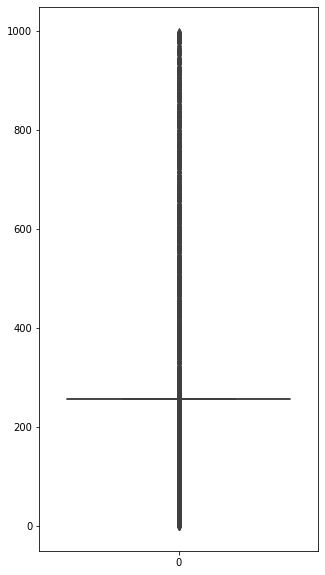

count    4829.000000
mean      257.239801
std       153.371912
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [145]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['ratings'])
plt.show()

print(data['ratings'].describe())

- the mean value is also same as median, which suggests that the distribution of the data points is approximately symmetric.
- minimum value in your dataset is 0 and the maximum value is 999, This indicates that there are some extreme values in your dataset that are significantly higher or lower than the majority of the data points.
- These extreme values are also known as outliers.

**Let handle outliers in rating column**

In [149]:
outliers_rating = data[(data['ratings'] >= 260) | (data['ratings'] <= 0)].count()

outliers_rating

book title    549
ratings       549
avg_score     549
author        549
score         549
votes         549
dtype: int64

- 549 rows having outliers 
- adjusting the outlier with median value


In [161]:
median = np.median(data['ratings'])
data.loc[(data['ratings'] >= 258) | (data['ratings'] <= 0), 'ratings'] = median

<AxesSubplot: xlabel='ratings', ylabel='Count'>

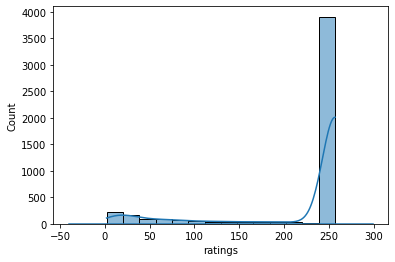

In [178]:
sns.histplot(data=data, x="ratings", kde=True)
sns.kdeplot(data=data, x="ratings")

- In this diagram we have concluded that  'ratings' column has  more than 2000 value of 256. 

In [187]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['ratings'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')


Data does not look normally distributed (reject H0)


In [189]:
# Perform log transformation on the 'ratings' column
data['ratings_log'] = np.log(data['ratings'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['ratings_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.413, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='ratings', ylabel='Count'>

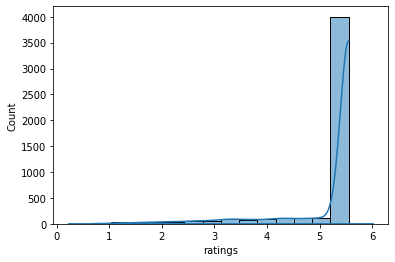

In [190]:
sns.histplot(data=data, x="ratings", kde=True)
sns.kdeplot(data=data, x="ratings")

**2. Avg_score column**

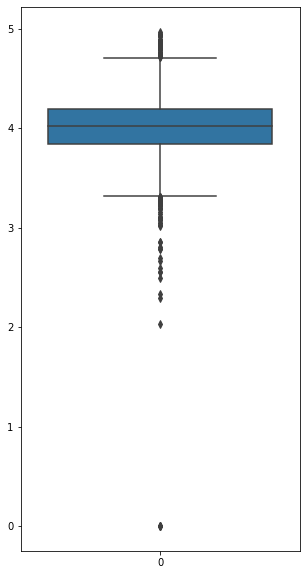

count    4822.000000
mean        4.007650
std         0.311352
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


In [160]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['avg_score'])
plt.show()

print(data['avg_score'].describe())


**Let handle outliers in avg_score column**

In [ ]:
# Calculate the IQR for the votes column
q1 = data['avg_score'].quantile(0.25)
q3 = data['avg_score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_votes =data[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound)].count()

- as per abobe desciption the IQR is Q3-Q1 = 4.19-3.84 = 0.35. Therefore, any loer bound value Q1-1.5*IQR = 3.285 or upper bound value Q3+1.5IQR = 4.745 can be considered as outliers.

    Note: i didnt use this method in ratings col because of having same value 

In [164]:
outliers_avg=data[(data['avg_score'] <=3.285) | (data['avg_score'] >=4.745)].count()
outliers_avg

book title    91
ratings       91
avg_score     91
author        91
score         91
votes         91
dtype: int64

In [165]:
median = np.median(data['votes'])
data.loc[(data['votes'] < lower_bound) | (data['votes'] > upper_bound), 'votes'] = median

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

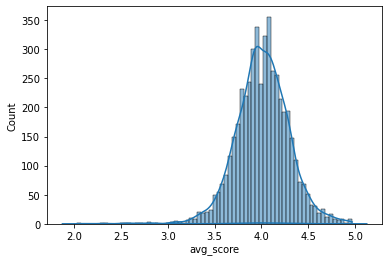

In [177]:
sns.histplot(data=data, x="avg_score", kde=True)
sns.kdeplot(data=data, x="avg_score")

In [191]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['avg_score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data looks normally distributed (fail to reject H0)


now it look like normally distributed

**3. votes**

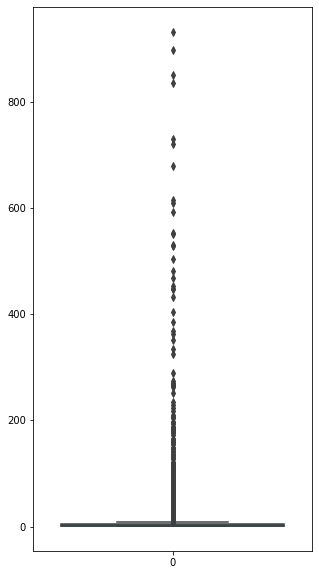

count    4829.000000
mean       10.595361
std        49.078694
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [173]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['votes'])
plt.show()

print(data['votes'].describe())

**Let handle outliers in votes column**

In [179]:
# Calculate the IQR for the votes column
q1 = data['votes'].quantile(0.25)
q3 = data['votes'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_votes =data[(data['votes'] < lower_bound) | (data['votes'] > upper_bound)].count()
outliers_votes

book title    688
ratings       688
avg_score     688
author        688
score         688
votes         688
dtype: int64

This code will calculate the IQR for the votes column and then identify any potential outliers that fall below the lower bound or above the upper bound.

In [180]:
median = np.median(data['votes'])
data.loc[(data['votes'] < lower_bound) | (data['votes'] > upper_bound), 'votes'] = median

<AxesSubplot: xlabel='votes', ylabel='Count'>

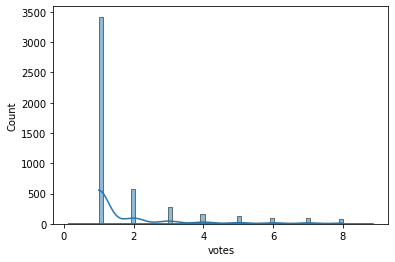

In [181]:
sns.histplot(data=data, x="votes", kde=True)
sns.kdeplot(data=data, x="votes")

In [192]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['votes'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


In [193]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.630, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='votes_log', ylabel='Count'>

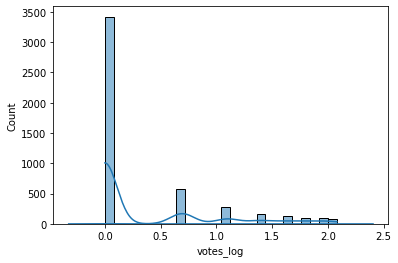

In [195]:
sns.histplot(data=data, x="votes_log", kde=True)
sns.kdeplot(data=data, x="votes_log")

**4. score**

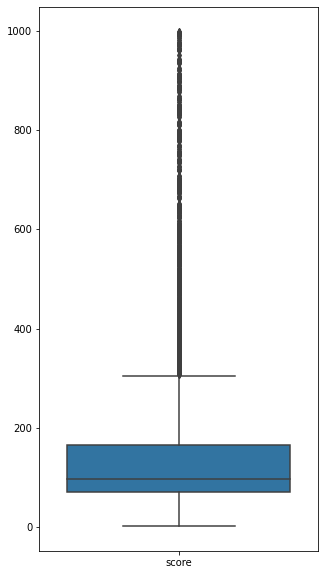

count    4829.000000
mean      154.543591
std       179.284128
min         1.000000
25%        69.000000
50%        96.000000
75%       164.000000
max       999.000000
Name: score, dtype: float64


In [183]:
score=pd.DataFrame(data, columns=['score'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=score)
plt.show()

print(data['score'].describe())

**Let handle outliers in score column**

In [184]:
# Calculate the IQR for the votes column
q1 = data['score'].quantile(0.25)
q3 = data['score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_score =data[(data['score'] < lower_bound) | (data['score'] > upper_bound)].count()
outliers_score

book title    619
ratings       619
avg_score     619
author        619
score         619
votes         619
dtype: int64

In [185]:
median = np.median(data['score'])
data.loc[(data['score'] < lower_bound) | (data['score'] > upper_bound), 'score'] = median

<AxesSubplot: xlabel='score', ylabel='Count'>

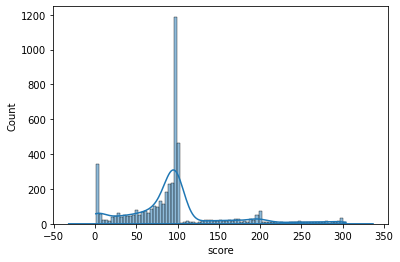

In [186]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

distribution lightly skewded 

In [196]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


In [197]:
# Perform log transformation on the 'ratings' column
data['score_log'] = np.log(data['score'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['score_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.679, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score_log', ylabel='Count'>

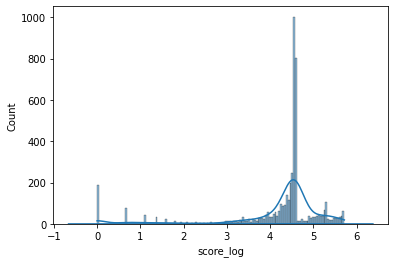

In [198]:
sns.histplot(data=data, x="score_log", kde=True)
sns.kdeplot(data=data, x="score_log")

In [204]:
data = data.drop(columns=['ratings_log','votes_log','score_log'])


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4829 non-null   object 
 1   ratings     4829 non-null   float64
 2   avg_score   4817 non-null   float64
 3   author      4829 non-null   object 
 4   score       4829 non-null   float64
 5   votes       4829 non-null   float64
dtypes: float64(4), object(2)
memory usage: 393.1+ KB


In [206]:
data.describe()

,ratings,avg_score,score,votes
count,4829.000000,4817.000000,4829.000000,4829.000000
mean,5.217293,4.011810,95.363222,1.767240
std,0.842792,0.283458,59.824822,1.564703
min,0.693147,2.030000,1.000000,1.000000
25%,5.549076,3.840000,69.000000,1.000000
50%,5.549076,4.020000,96.000000,1.000000
75%,5.549076,4.190000,100.000000,2.000000
max,5.549076,4.970000,304.000000,8.000000


## EDA

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 1817 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  2629 non-null   object 
 1   ratings     2629 non-null   float64
 2   avg_score   2622 non-null   float64
 3   author      2629 non-null   object 
 4   score       2629 non-null   float64
 5   votes       2629 non-null   float64
dtypes: float64(4), object(2)
memory usage: 143.8+ KB


In [48]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
1817,"Captives of the Night (Scoundrels, #2)",257.0,3.65,Loretta Chase,149.0,2.0
1818,"Meridian (Fenestra, #1)",257.0,3.71,Amber Kizer,149.0,3.0
1820,"The Ones Who Got Away (The Ones Who Got Away, #1)",257.0,3.93,Roni Loren,149.0,2.0
1821,"Dragon's Lair (Wind Dragons MC, #1)",257.0,3.97,Chantal Fernando,149.0,2.0
1822,"A Kiss for Midwinter (Brothers Sinister, #1.5)",257.0,3.88,Courtney Milan,148.0,2.0
...,...,...,...,...,...,...
4992,"Local Custom (Liaden Universe, #5)",257.0,4.27,Sharon Lee,20.0,1.0
4993,The Endearment,257.0,4.04,LaVyrle Spencer,20.0,1.0
4994,Ein Hauch von Skandal,257.0,4.06,Sandra Brown,20.0,1.0
4995,Nothing Personal,257.0,3.63,Jaci Burton,19.0,1.0


In [49]:
print("number of author",data.author.nunique())

number of author 1639


In [50]:
print( data['author'].value_counts())

Eloisa James        22
Ella Fox            20
Nora Roberts        17
Suzanne Halliday    15
Dannika Dark        14
                    ..
C.L. Wilson          1
Tierney O'Malley     1
Denise Domning       1
Beth Ehemann         1
Mina Carter          1
Name: author, Length: 1639, dtype: int64


In [51]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [52]:
dfvalued=data.groupby(['book title','author'],as_index=False).votes.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="votes",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,votes
1116,"Lethal Rider (Lords of Deliverance, #3; Demoni...",Larissa Ione,4.0
1240,"Meant to Be (The Saving Angels, #1)",Tiffany King,4.0
2457,"Until the Sun Falls from the Sky (The Three, #1)",Kristen Ashley,3.0
2577,"Wizard's First Rule (Sword of Truth, #1)",Terry Goodkind,3.0
1519,"Proof by Seduction (Carhart, #1)",Courtney Milan,3.0
2025,"The Forbidden Lord (Lord Trilogy, #2)",Sabrina Jeffries,3.0
1054,"Kidnapping Casey (Zorn Warriors, #2)",Laurann Dohner,3.0
167,"Always You (Best Friend, #1)",Kirsty Moseley,3.0
47,A Lady's Lesson in Scandal,Meredith Duran,3.0
2255,"The Taming of the Duke (Essex Sisters, #3)",Eloisa James,3.0


In [53]:
dfvalued=data.groupby(['book title','author'],as_index=False).ratings.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="ratings",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,ratings
101,"A Will to Change (Hope, #2)",Beth Rinyu,299.0
287,Beyond the Break (Conch Garden Book 1),Kristen Mae,298.0
1055,Kidnapping the Brazilian Tycoon,Carmen Falcone,298.0
1158,"Losing Lola (Mercy's Angels, #5)",Kirsty Dallas,297.0
1329,Never Laugh At Love,Barbara Cartland,295.0
2518,When a Man Marries,Mary Roberts Rinehart,292.0
1431,Original Justice (Justice Brothers #4),Suzanne Halliday,290.0
1840,Surrender,D.M. Mortier,290.0
305,Blood Script,Airicka Phoenix,290.0
1592,"Rock Notes (Heartbeat, #1)",Renee Lee Fisher,289.0
